In [4]:
from models import RandomWalk

assignment 1 - add def etc

In [5]:
walk = RandomWalk()
position_list = walk.generate(starting_position=(3, 3), num_of_steps=10)

position_list

[(3, 3),
 (2, 3),
 (1, 3),
 (2, 3),
 (1, 3),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 7)]

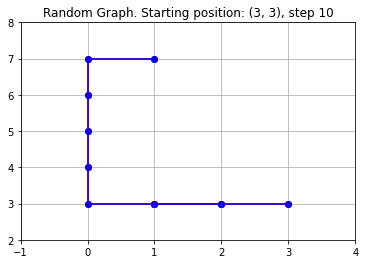

In [6]:
walk.save_walk_to_gif()
# change that there